In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from patsy.builtins import *

In [2]:
gdp_le = pd.read_csv("../data/gdp_le.csv")
gdp_le.head()

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
1,Afghanistan,2020,1968.341002,Asia,62.575
2,Afghanistan,2019,2079.921861,Asia,63.565
3,Afghanistan,2018,2060.698973,Asia,63.081
4,Afghanistan,2017,2096.093111,Asia,63.016


Start by fitting a linear regression model with target being life expectancy and predictor variable year.

<b>a. What coefficients do you get? Interpret the meaning of these coefficents.</b>

<Axes: xlabel='Year', ylabel='Life_Expectancy'>

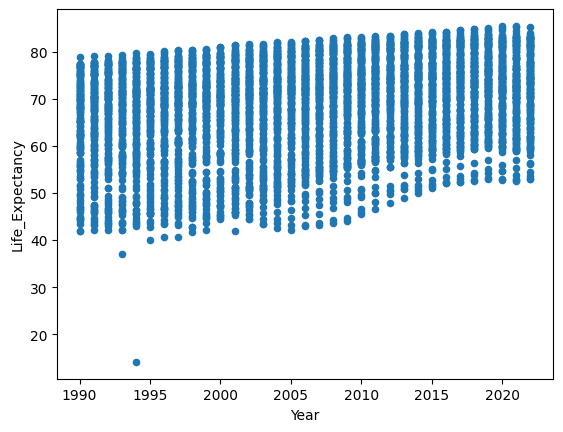

In [11]:
gdp_le.plot(kind='scatter', x='Year', y='Life_Expectancy')

In [6]:
import statsmodels.formula.api as smf

In [7]:
lr_life_expectancy = smf.ols("Life_Expectancy ~ Year", data=gdp_le).fit()

In [10]:
lr_life_expectancy.params

Intercept   -468.138140
Year           0.267722
dtype: float64

The negative intercept doesn't make sense here because life expecntancy will not be in negative. Interpretting the coefficient will be difficult in this case


<b>b. Using just the year makes the intercept term difficult to interpret. Create a new model, but this time use years since 1990 as your predictor variable. Hint: You can the patsy identity function to modify your predictors in your model formula. Inspect the new coefficients and interpret the meaning of them. Are they statistically significant?</b>


In [23]:
lr_life_expectancy_mod = smf.ols("Life_Expectancy ~ I(Year - 1990)", data=gdp_le).fit()

In [24]:
lr_life_expectancy_mod.params

Intercept         64.628889
I(Year - 1990)     0.267722
dtype: float64

Substituting these estimates into the model, we get

$$Mean(Life Expectnacy) = 64.628889 + 0.267722(Year)$$

The new coefficient is 0.268 which means that for a given year after 1990 the life expectancy is increaed by 0.267 year.
Lets look at some other parameter from the model.

In [25]:
lr_life_expectancy_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     424.0
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           8.13e-91
Time:                        18:59:07   Log-Likelihood:                -19950.
No. Observations:                5504   AIC:                         3.990e+04
Df Residuals:                    5502   BIC:                         3.992e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         64.6289      0.245    263.308      0.000      64.148      65.110
I(Year - 1990)     0.2677      0.013     20.591      0.000       0.242       0.293
==============================================================================
Omnibus:                      387.409   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              469.138
Skew:                          -0.709   Prob(JB):                    1.34e-102
Kurtosis:                       2.820   Cond. No.                         37.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the P Value and confidence interval this relation is statistically signiifcant.
The P value is zero and the confidence interval doen't have zero.

<b>C. Compare the actual mean life expectancy per year to the model's estimate. How well does it do? </b>

In [26]:
mean_le = gdp_le['Life_Expectancy'].mean()

69.01011528644356

The mean life expectancy per year is more than the model's estimate. That means that the model has underestimated the
life expectnacy.
<br>




<b>d. Plot the actual values against your model's estimates for the mean life expectancy.</b>

In [45]:
pred_df = pd.DataFrame(
    {
        'Year': np.arange(gdp_le['Year'].min(), gdp_le['Year'].max()) #used np.arrange as year is whole number
    }
)

pred_df['mean_estimate'] = lr_life_expectancy_mod.predict(pred_df)

pred_df

,Year,mean_estimate
0,1990,64.628889
1,1991,64.896612
2,1992,65.164334
3,1993,65.432056
4,1994,65.699778
5,1995,65.967500
6,1996,66.235222
7,1997,66.502944
8,1998,66.770666
9,1999,67.038389


In [46]:
#verify the above model estimates
Year = 1
estimate = lr_life_expectancy_mod.params['Intercept'] + lr_life_expectancy_mod.params['I(Year - 1990)']*tail_l
estimate

64.62888940412682

Plot these estimates with original dataset

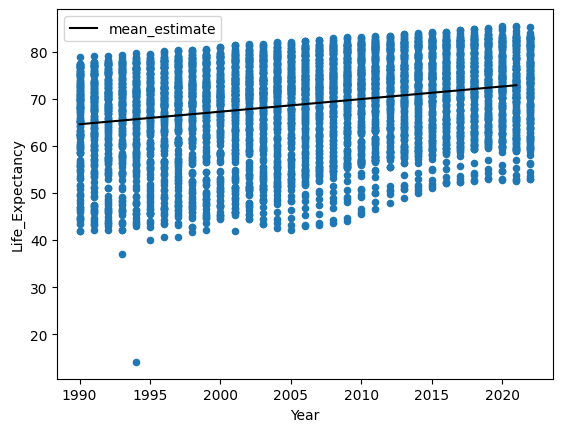

In [47]:
fig, ax = plt.subplots()
gdp_le.plot(kind="scatter", x="Year", y="Life_Expectancy", ax=ax)
pred_df.plot(kind="line", x="Year", y="mean_estimate", color="black", ax=ax);

<b>e. Inspect the R-squared value for the model. does it make sense, given the plot? </b>

The R-Squared values is 0.072 which is about 7.2% variability of life expectancy. The R-squared is very low from the model which raises questions on the strength of this relationship.


<b>2. Filter the full dataset down to just the year 2021. Fit a linear regression model with target being life expectancy and predictor variable gdp per capita.</b>


a. What coefficients do you get? Interpret the meaning of those coefficients.

b. Refit your model, but this time use thousands of dollars of gdp per capita as your predictor. How does this change your coefficients?

c. Are the coefficients statistically significant?

d. What does your model estimate for the mean life expectancy for a country whose gdp per capita is $50,000? What about one whose gdp per capita is $100,000? e. Plot the actual values compared to your model's estimates for mean life expectancy. How would you assess the model's fit?

In [58]:
gdp_le_2021 = gdp_le[gdp_le['Year'] == 2021]

In [59]:
gdp_le_2021

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
21,Albania,2021,14595.944386,Europe,76.463
54,Algeria,2021,11029.138782,Africa,76.377
87,Angola,2021,5911.835657,Africa,61.643
120,Antigua and Barbuda,2021,19899.882425,North America,78.497
...,...,...,...,...,...
5344,Uzbekistan,2021,7800.501501,Asia,70.862
5377,Vanuatu,2021,2800.493866,Oceania,70.449
5410,West Bank and Gaza,2021,5641.044400,Asia,73.473
5439,Zambia,2021,3236.788981,Africa,61.223


<b>. What coefficients do you get? Interpret the meaning of those coefficients.</b>

In [60]:
lr_le_gdp_capita = smf.ols("Life_Expectancy ~ GDP_Per_Capita", data=gdp_le_2021).fit()

In [62]:
lr_le_gdp_capita.params

Intercept         65.949870
GDP_Per_Capita     0.000257
dtype: float64

Substituting these estimates into the model, we get

$$Mean(Life Expectnacy) = 65.949870 + 0.000257(GDS Per capita)$$

Based on the coefficients it means that every unit change in GDP Per Capita, the life expectancy is 0.000257

 <b>2.Refit your model, but this time use thousands of dollars of gdp per capita as your predictor. How does this change your coefficients? </b>

In [72]:
lr_le_gdp_capita_mod = smf.ols("Life_Expectancy ~ I(GDP_Per_Capita / 1000)", data=gdp_le_2021).fit()
lr_le_gdp_capita_mod.params

Intercept                   65.949870
I(GDP_Per_Capita / 1000)     0.256892
dtype: float64

Substituting these estimates into the model, we get

$$Mean(Life Expectancy) = 65.949870 + 0.256892(GDP Per capita)$$

There is a significant change in the coefficient. Per unit change in GDP per Capita, the life expectancy is now increased by 0.256892

<b>c. Are the coefficients statistically significant?</b>

In [73]:
lr_le_gdp_capita_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     213.4
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           6.81e-32
Time:                        11:31:57   Log-Likelihood:                -529.25
No. Observations:                 173   AIC:                             1062.
Df Residuals:                     171   BIC:                             1069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   65.9499      0.549    120.225      0.000      64.867      67.033
I(GDP_Per_Capita / 1000)     0.2569      0.018     14.608      0.000       0.222       0.292
==============================================================================
Omnibus:                       11.676   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.725
Skew:                          -0.664   Prob(JB):                      0.00173
Kurtosis:                       2.946   Cond. No.                         43.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Looking at the P-Value, the coefficients are statistically significant.

<b> d. What does your model estimate for the mean life expectancy for a country whose gdp per capita is $50,000? </b>

<b>What about one whose gdp per capita is $100,000? </b>

In [84]:
lr_le_gdp_capita_mod.predict(pd.DataFrame({'GDP_Per_Capita': [50000]}))

0    78.794457
dtype: float64

The model estimates life expectancy = 78.794

In [75]:
lr_le_gdp_capita_mod.predict(pd.DataFrame({'GDP_Per_Capita': [100000]}))

0    91.639045
dtype: float64

The model estimates life expectancy = 91.639

In [99]:
pred_df = pd.DataFrame(
    {
        'GDP_Per_Capita': np.linspace(gdp_le_2021['GDP_Per_Capita'].min(), gdp_le_2021['GDP_Per_Capita'].max()) 
    }
)
pred_df['mean_estimate'] = lr_le_gdp_capita_mod.predict(pred_df)

pred_df

,GDP_Per_Capita,mean_estimate
0,714.066712,66.133308
1,3060.381549,66.736057
2,5406.696386,67.338806
3,7753.011222,67.941554
4,10099.326059,68.544303
5,12445.640896,69.147052
6,14791.955732,69.749801
7,17138.270569,70.352550
8,19484.585406,70.955299
9,21830.900242,71.558048


In [100]:
 #verify the estimates
    65.949870 + (0.256892 * (3060.381549/1000))

66.73605753688571

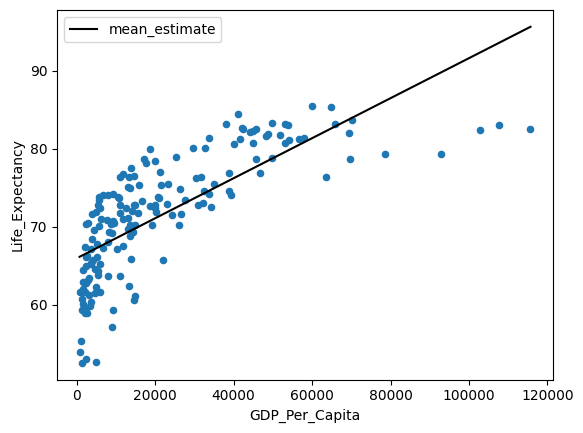

In [104]:
fig, ax = plt.subplots()
gdp_le_2021.plot(kind="scatter", x="GDP_Per_Capita", y="Life_Expectancy", ax=ax)
pred_df.plot(kind="line", x="GDP_Per_Capita", y="mean_estimate", color="black", ax=ax);

let's take a look at the residuals 

In [106]:
gdp_le_2021.sample()

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
482,Belgium,2021,51823.50753,Europe,81.790244


In [107]:
lr_le_gdp_capita_mod.predict(pd.DataFrame({'GDP_Per_Capita': [51823.50753]}))

0    79.262901
dtype: float64

For a given sample GDP_Per_capita - after calcualting the life expectancy from model, it appears that the model 
has underestimated the life expectancy.



<b>3. Now, fit a model for life expectancy based on the log of gdp per capita.</b>

In [110]:
gdp_le_2021['log_gdp_per_capita'] = np.log(gdp_le_2021['GDP_Per_Capita'])
#no need 

C:\Users\nitin\AppData\Local\Temp\ipykernel_43636\945655768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_le_2021['log_gdp_per_capita'] = np.log(gdp_le_2021['GDP_Per_Capita'])


In [111]:
gdp_le_2021

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,log_gdp_per_capita
0,Afghanistan,2021,1517.016266,Asia,61.982,7.324501
21,Albania,2021,14595.944386,Europe,76.463,9.588499
54,Algeria,2021,11029.138782,Africa,76.377,9.308296
87,Angola,2021,5911.835657,Africa,61.643,8.684712
120,Antigua and Barbuda,2021,19899.882425,North America,78.497,9.898469
...,...,...,...,...,...,...
5344,Uzbekistan,2021,7800.501501,Asia,70.862,8.961943
5377,Vanuatu,2021,2800.493866,Oceania,70.449,7.937551
5410,West Bank and Gaza,2021,5641.044400,Asia,73.473,8.637825
5439,Zambia,2021,3236.788981,Africa,61.223,8.082337


In [114]:
lr_le_log_gdp_capita = smf.ols("Life_Expectancy ~ log_gdp_per_capita", data=gdp_le_2021).fit()
lr_le_log_gdp_capita.params

Intercept             18.946970
log_gdp_per_capita     5.589014
dtype: float64

<B>Inspect the coefficients for this model. Are they statistically significant? </b>

In [116]:
lr_le_log_gdp_capita.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     432.6
Date:                Sat, 19 Oct 2024   Prob (F-statistic):           1.06e-48
Time:                        12:26:36   Log-Likelihood:                -490.22
No. Observations:                 173   AIC:                             984.4
Df Residuals:                     171   BIC:                             990.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             18.9470      2.547      7.438      0.000      13.919      23.975
log_gdp_per_capita     5.5890      0.269     20.798      0.000       5.059       6.119
==============================================================================
Omnibus:                       16.862   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.922
Skew:                          -0.725   Prob(JB):                     7.78e-05
Kurtosis:                       3.725   Cond. No.                         77.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After checking the  P-Value, the coefficients appear to be statistically significant.

<b>b. Interpret these coefficients. What does the model estimate for the average life expectancy for countries with a gdp per capita of $50,000? </b>

The cofficients suggest that for every log unit change in GDP per capita, the life expectancy changes by 5.58

In [119]:
lr_le_log_gdp_capita.predict(pd.DataFrame({'log_gdp_per_capita': [np.log(50000)]}))

0    79.418861
dtype: float64

<b>What about for those with a gdp per capita of $100,000? </b>

In [120]:
lr_le_log_gdp_capita.predict(pd.DataFrame({'log_gdp_per_capita': [np.log(100000)]}))

0    83.29287
dtype: float64

<b> c. Plot the actual values compared to your models' estimates for the mean life expectancy. How does this compare to the non-logged model?</b>

In [123]:
pred_df = pd.DataFrame(
    {
        'log_gdp_per_capita': np.linspace(gdp_le_2021['log_gdp_per_capita'].min(), gdp_le_2021['log_gdp_per_capita'].max()) 
    }
)
pred_df['mean_estimate'] = lr_le_log_gdp_capita.predict(pred_df)

pred_df

,log_gdp_per_capita,mean_estimate
0,6.570976,55.672248
1,6.674806,56.252552
2,6.778635,56.832855
3,6.882464,57.413159
4,6.986294,57.993462
5,7.090123,58.573766
6,7.193952,59.154069
7,7.297782,59.734373
8,7.401611,60.314676
9,7.505440,60.894980


In [124]:
Verify the above estimates
18.9470 + (5.5890 * 6.570976)

55.672184864

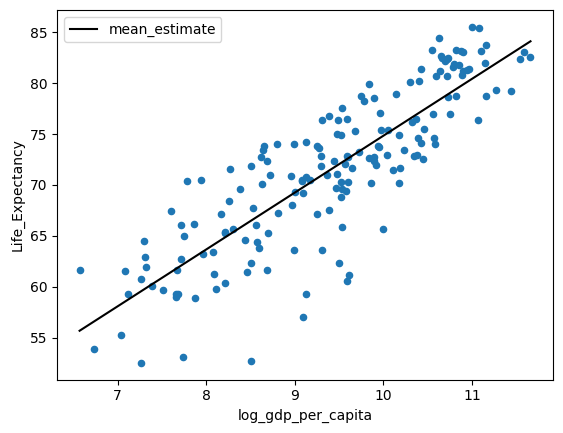

In [125]:
fig, ax = plt.subplots()
gdp_le_2021.plot(kind="scatter", x="log_gdp_per_capita", y="Life_Expectancy", ax=ax)
pred_df.plot(kind="line", x="log_gdp_per_capita", y="mean_estimate", color="black", ax=ax);

After comparing this to non-log model, the fitted line is correctly overlayed on the actual observations. The linear relation in
log model can be seen very clearly.
Also - the residual plot doesn't show any particular pattern.

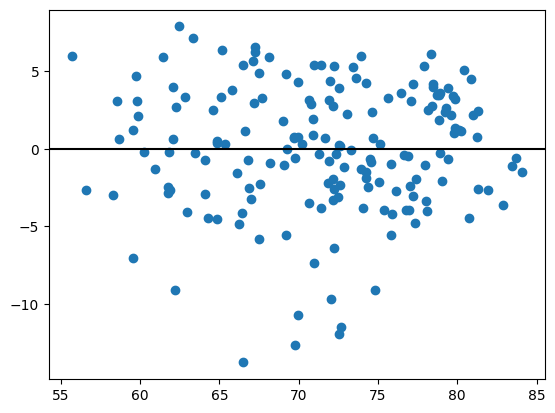

In [137]:
plt.scatter(lr_le_log_gdp_capita.fittedvalues, lr_le_log_gdp_capita.resid)
xmin, xmax = plt.xlim()
plt.hlines(y = 0, xmin = xmin, xmax = xmax, color = 'black')
plt.xlim(xmin, xmax);

<br>

<b>Finally, return to the full dataset.
    
    a. First, fit a linear regression model for life expectancy based on the log of gdp per capita.
    
    b. Then, add the year variable to your model. How can you interpret the coefficient associated with year? What limitations or weaknesses might this model have?</b>

In [128]:
gdp_le

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2021,1517.016266,Asia,61.982
1,Afghanistan,2020,1968.341002,Asia,62.575
2,Afghanistan,2019,2079.921861,Asia,63.565
3,Afghanistan,2018,2060.698973,Asia,63.081
4,Afghanistan,2017,2096.093111,Asia,63.016
...,...,...,...,...,...
5499,Zimbabwe,1994,2670.106615,Africa,52.588
5500,Zimbabwe,1993,2458.783255,Africa,54.426
5501,Zimbabwe,1992,2468.278257,Africa,56.435
5502,Zimbabwe,1991,2781.787843,Africa,58.091


In [131]:
gdp_le['log_le_gdp_per_capita'] = np.log(gdp_le['GDP_Per_Capita'])

In [134]:
lr_le_log_gdp_capita_main = smf.ols("Life_Expectancy ~ log_le_gdp_per_capita", data=gdp_le).fit()
lr_le_log_gdp_capita_main.params

Intercept                9.194102
log_le_gdp_per_capita    6.531130
dtype: float64

In [135]:
lr_le_log_gdp_capita_main.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                 1.288e+04
Date:                Sat, 19 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:53:54   Log-Likelihood:                -16834.
No. Observations:                5504   AIC:                         3.367e+04
Df Residuals:                    5502   BIC:                         3.369e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 9.1941      0.532     17.297      0.000       8.152      10.236
log_le_gdp_per_capita     6.5311      0.058    113.506      0.000       6.418       6.644
==============================================================================
Omnibus:                     1066.762   Durbin-Watson:                   0.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2391.301
Skew:                          -1.108   Prob(JB):                         0.00
Kurtosis:                       5.349   Cond. No.                         71.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
lr_le_log_gdp_capita_main_Year = smf.ols("Life_Expectancy ~ log_le_gdp_per_capita + Year", data=gdp_le).fit()
lr_le_log_gdp_capita_main_Year.params

Intercept               -259.067406
log_le_gdp_per_capita      6.359936
Year                       0.134487
dtype: float64

The coefficients have been changed now by bringing "Year" into the model. Basically the intercept is totally switched into negative 
which really doen't make sense in this case.It would be good to skip year variable from this model as it is impcating the
target variable.